## Time Sensitive Task #2
Submission by: Halit Vural - C9807 <br>
Submission date: Feb 8, 2022

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [ ]:
df=pd.read_csv("health_train.csv")
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [ ]:
df.shape

(2500, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2500 non-null   float64
 1   sex       2500 non-null   object 
 2   bmi       2500 non-null   float64
 3   smoker    2500 non-null   object 
 4   region    2500 non-null   object 
 5   children  2500 non-null   int64  
 6   charges   2500 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 136.8+ KB


In [ ]:
df.isnull().any()

age         False
sex         False
bmi         False
smoker      False
region      False
children    False
charges     False
dtype: bool

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2500.0,39.003033,12.264536,18.0000,28.845667,39.350208,48.688741,64.00000
bmi,2500.0,30.575497,5.390169,15.9600,26.717647,30.200000,34.046166,53.13000
children,2500.0,2.488400,1.707346,0.0000,1.000000,2.000000,4.000000,5.00000
charges,2500.0,12679.311518,10593.270485,1121.8739,5612.780878,9455.047274,14440.628060,63770.42801


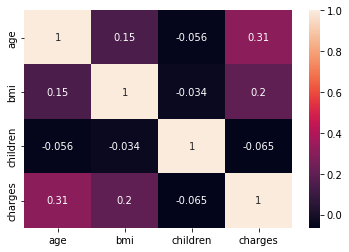

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


## Train test split

We apply Encoder to convert categories into numbers.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
X=df.drop("charges", axis=1)
y=df.charges

In [ ]:
cat = X.select_dtypes("object").columns
cat

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,age,sex,bmi,smoker,region,children
0,21.000000,1.0,25.745000,0.0,0.0,2
1,36.976978,0.0,25.744165,1.0,2.0,3
2,18.000000,1.0,30.030000,0.0,2.0,1
3,37.000000,1.0,30.676891,0.0,0.0,3
4,58.000000,1.0,32.010000,0.0,2.0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (2000, 6)
Train target shape   :  (2000,)
Test features shape  :  (500, 6)
Test target shape    :  (500,)


## Modeling

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

## Adaboost Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
#base_estimator=DecisionTreeRegressor(max_depth=3)
ada_model = AdaBoostRegressor(random_state=42, n_estimators=50)

In [ ]:
ada_model.fit(X_train, y_train)

AdaBoostRegressor(random_state=42)

In [ ]:
train_val(ada_model, X_train, y_train, X_test, y_test)

,train,test
R2,5.747814e-01,5.195411e-01
mae,6.471985e+03,6.581808e+03
mse,4.850323e+07,5.001888e+07
rmse,6.964426e+03,7.072403e+03


In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
model = AdaBoostRegressor(random_state=42, n_estimators=50)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             6.476408e-01
test_neg_mean_absolute_error       -5.475229e+03
test_neg_mean_squared_error        -3.981042e+07
test_neg_root_mean_squared_error   -6.270069e+03
dtype: float64

In [ ]:
from sklearn.tree import plot_tree

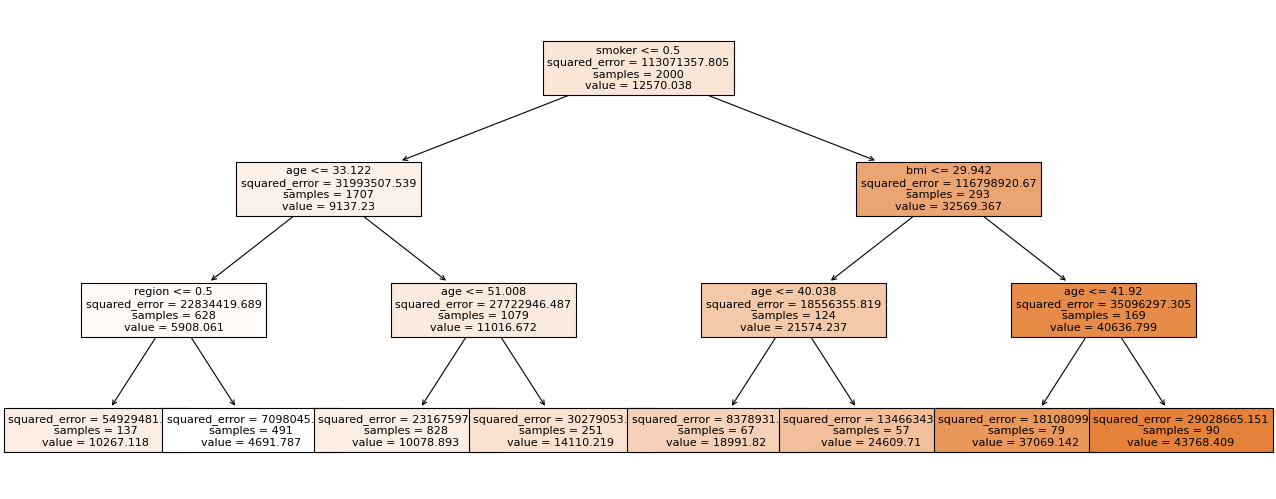

In [ ]:
model = AdaBoostRegressor(random_state=42, n_estimators=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

features = list(X.columns)
plt.figure(figsize=(20,8),dpi=80)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, fontsize=10);

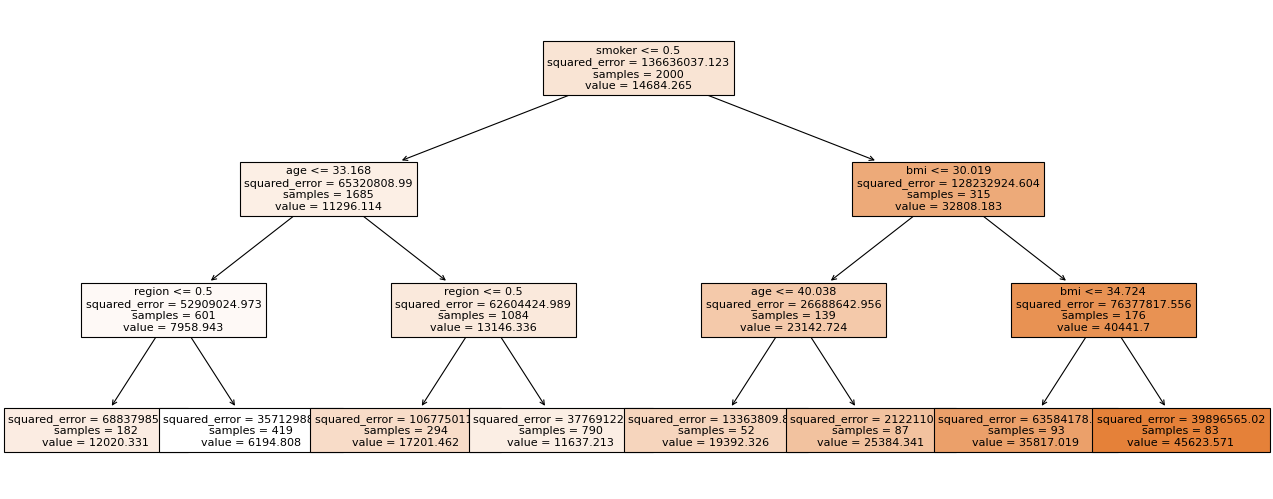

In [ ]:
plt.figure(figsize=(20,8),dpi=80)
plot_tree(model.estimators_[1], filled=True, feature_names=X.columns, fontsize=10);

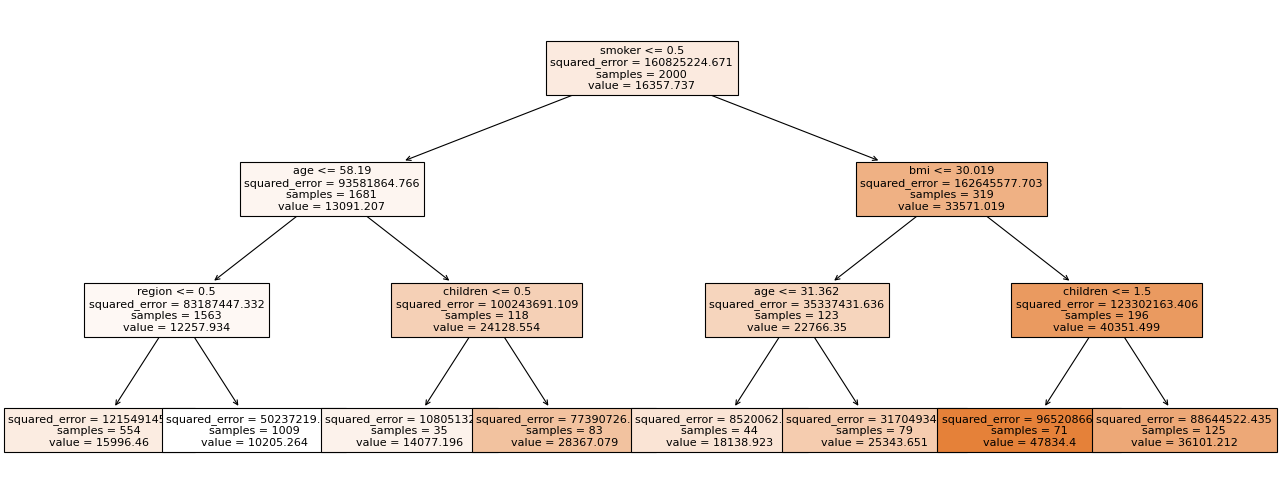

In [ ]:
plt.figure(figsize=(20,8),dpi=80)
plot_tree(model.estimators_[2], filled=True, feature_names=X.columns, fontsize=10);

In [ ]:
y_pred  

array([10205.26393648,  6194.80758575, 43768.40906037, 11637.2128859 ,
       10205.26393648, 15996.4600311 , 11637.2128859 , 15996.4600311 ,
       10205.26393648,  6194.80758575, 15996.4600311 , 10205.26393648,
       45623.57113277, 10205.26393648, 37069.14162923, 12020.3314202 ,
       10205.26393648, 10205.26393648, 12020.3314202 , 15996.4600311 ,
       45623.57113277, 25343.65086166, 11637.2128859 ,  6194.80758575,
       36101.21213763,  6194.80758575, 10205.26393648, 11637.2128859 ,
       10205.26393648, 10205.26393648, 10205.26393648,  6194.80758575,
       12020.3314202 , 10205.26393648, 15996.4600311 , 12020.3314202 ,
        6194.80758575,  6194.80758575, 10205.26393648, 15996.4600311 ,
        6194.80758575, 15996.4600311 , 14110.21945814, 10205.26393648,
       19392.32616478, 10205.26393648,  6194.80758575, 10205.26393648,
       18991.82015528, 10205.26393648, 10205.26393648, 10205.26393648,
       15996.4600311 , 11637.2128859 , 45623.57113277, 10205.26393648,
      

In [ ]:
np.array(y_test)

array([ 8548.13238576,  4234.927     , 42760.5022    , 10959.6947    ,
       28105.23410008, 10923.9332    , 11259.70646164,  9365.28148696,
        7740.337     ,  5398.89124755,  8603.8234    , 15973.62025285,
       35585.576     ,  9566.9909    , 41332.53042404,  1705.6245    ,
       13275.31797281,  7949.74765995,  3925.7582    , 25517.11363   ,
       47916.96478905, 32787.45859   , 12094.478     ,  4889.9995    ,
       44213.42215506,  4537.27287589,  4751.07      , 12494.18834205,
        8598.26727152, 10289.47054945, 11115.51768275,  3293.29186289,
        4434.92105277,  7443.64305   ,  7935.29115   , 19071.28756111,
        2699.56835   ,  1391.5287    , 11232.94177419, 11390.65070035,
        6738.01184727, 13047.33235   , 13846.96233875, 11509.60850099,
       20773.62775   ,  8878.8577879 ,  4828.51424771,  9654.18201555,
       17776.63877102, 10313.14429617, 10967.51773573,  8773.60964463,
        6402.29135   , 11611.70818634, 48173.361     , 10104.56021899,
      

## Gridsearch for Adaboosting

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {"n_estimators":[50, 100, 200, 300, 500],
              "learning_rate":[0.1, 0.5, 0.8, 1],
              "loss": ["linear", "square"]
            }

In [ ]:
model = AdaBoostRegressor(random_state=42)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.8, 1],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_model.best_params_

{'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 50}

In [ ]:
grid_model.best_score_

-4996.368376164078

In [ ]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,8.000224e-01,7.678591e-01
mae,3.389513e+03,3.491518e+03
mse,2.281076e+07,2.416737e+07
rmse,4.776062e+03,4.916032e+03


## Feature importance

In [ ]:
model = AdaBoostRegressor(random_state=42,n_estimators=500, learning_rate=0.1)
model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=500, random_state=42)

In [ ]:
model.feature_importances_

array([0.12827895, 0.00128696, 0.14522988, 0.6194179 , 0.04063898,
       0.06514733])

In [ ]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['ada_Importance'])
ada_imp_feats = imp_feats.sort_values('ada_Importance')
ada_imp_feats

,ada_Importance
sex,0.001287
region,0.040639
children,0.065147
age,0.128279
bmi,0.145230
smoker,0.619418


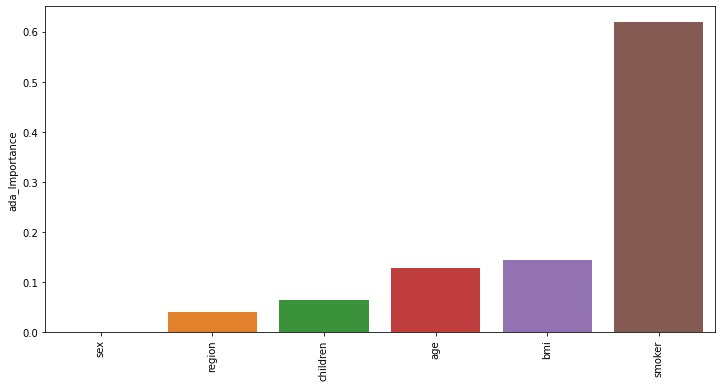

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y='ada_Importance')

plt.xticks(rotation=90);

## Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
grad_model = GradientBoostingRegressor(random_state=42)

In [ ]:
grad_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
train_val(grad_model, X_train, y_train, X_test, y_test)

,train,test
R2,8.926401e-01,8.422550e-01
mae,1.877182e+03,2.186758e+03
mse,1.224618e+07,1.642228e+07
rmse,3.499454e+03,4.052441e+03


__Cross_Validate__

In [ ]:
model = GradientBoostingRegressor(random_state=42)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             8.542579e-01
test_neg_mean_absolute_error       -2.171235e+03
test_neg_mean_squared_error        -1.632932e+07
test_neg_root_mean_squared_error   -4.008027e+03
dtype: float64

## Gridsearch for Gradientboosting

In [ ]:
param_grid = {"n_estimators":[100, 200, 300], "subsample":[0.8, 1], "max_features" : [None, 2, 3, 4],
            "learning_rate": [0.001, 0.01, 0.1, 0.5], 'max_depth':[2,3]}

In [ ]:
model = GradientBoostingRegressor(random_state=42)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'max_depth': [2, 3], 'max_features': [None, 2, 3, 4],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 2,
 'n_estimators': 300,
 'subsample': 0.8}

In [ ]:
grid_model.best_score_

-3944.472387056137

In [ ]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,9.178266e-01,8.454305e-01
mae,1.654441e+03,2.109123e+03
mse,9.373241e+06,1.609169e+07
rmse,3.061575e+03,4.011444e+03


In [ ]:
model = GradientBoostingRegressor(random_state=42, learning_rate=0.1, max_depth=3, max_features=2, n_estimators=300, subsample=0.8)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).mean()[2:]

test_r2                             8.588395e-01
test_neg_mean_absolute_error       -2.132676e+03
test_neg_mean_squared_error        -1.579648e+07
test_neg_root_mean_squared_error   -3.944472e+03
dtype: float64

SOLUTION WAS UNTIL HERE.

FINAL MODEL is grid_model.

## Feature importance

In [ ]:
model = GradientBoostingRegressor(random_state=101, max_depth=2, max_features=4, n_estimators=300, subsample=0.8)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, max_features=4, n_estimators=300,
                          random_state=101, subsample=0.8)

In [ ]:
model.feature_importances_

array([9.12937722e-02, 7.35751195e-01, 3.21390246e-02, 5.25140122e-02,
       1.35299779e-02, 2.01178997e-02, 2.58794909e-04, 5.43953234e-02])

In [ ]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['grad_Importance'])
grad_imp_feats = imp_feats.sort_values('grad_Importance')
grad_imp_feats

,grad_Importance
Owner,0.000259
Seller_Type,0.013530
Transmission,0.020118
Kms_Driven,0.032139
Fuel_Type,0.052514
vehicle_age,0.054395
Car_Name,0.091294
Present_Price,0.735751


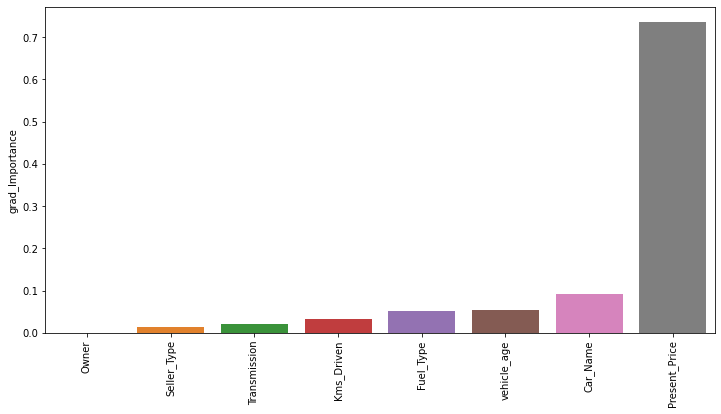

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_Importance')

plt.xticks(rotation=90);

## XG Boost Regressor

In [ ]:
#!pip install --upgrade pip

In [ ]:
#!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor(random_state=42, objective="reg:squarederror") #objective="reg:squarederror"

objective="reg:linear" olarak biraksak da ayni sonucu verir ama yeni surumde bu deger objective="reg:squarederror" olarak guncellendigi icin boyle yazdik. objective="reg:linear" olarak biraksak da ayni sonucu aliriz saadce uyari verir.

Buradaki parametrelerimiz de Classification ile ayni sadece min_child_weight=1 ile oynayarak ; gamma=0, 0 ile 1 arasinda degerler alir bununla oynayarak overfitting ile mucadele edebiliriz. 

subsample=1, tum datayi mi alsin yoksa datayi temsilen orneklem mi alsin diyebiliriz. colsample_bytree=1, max_feature ozelligi yerine kullanilan parametre. 

colsample_bylevel=1, subsamlpe ile oynaniyor ise bu degerle oynanmasi tavsiye edilmez. 

colsample_bynode=1, en dipte kalan yaprak sayilarini oransal olarak ayarlayabiliriz fakat bununla oynamak da max_depth'e gore cok zahmetlidir.

reg_alpha=0, 0 yerine 1 dersek lasso gibi davranirreg_lambda=1 ridge gibi davranir ve bu degerlerle oynayarak overfitting ile mucadele edilebilir. 

scale_pos_weight=1 sinif dengesizligi icin kullanilan bir parametredir. Fakat bu, binary dengesizlikler icin kullanilir. Class sayisi 2' den fazla ise bu parametre ile oynamanin etkisi olmaz. Multiclass datalarda scikit-learn' in 'Class Weight' denen bir fonksiyonu var bu kullanilir. (Proje2' de kullanildi.) 

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', random_state=42)

Datamiz bu modelle egitildikten sonra yukaridaki tum modellere kiyasla sonuclarimiz burada daha iyi cikti. rmse degerlerine baktigimizda train set degeri biraz yukselmis, test set degeri biraz dusmus. Yani birbirlerine biraz daha yaklasmislar. 

In [ ]:
train_val(xgb_model, X_train, y_train, X_test, y_test)

,train,test
R2,8.889604e-01,8.449517e-01
mae,1.890608e+03,2.132519e+03
mse,1.266590e+07,1.614153e+07
rmse,3.558919e+03,4.017652e+03


In [ ]:
model = XGBRegressor(random_state=42, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             8.553829e-01
test_neg_mean_absolute_error       -2.156648e+03
test_neg_mean_squared_error        -1.623167e+07
test_neg_root_mean_squared_error   -3.997835e+03
dtype: float64

## Gridsearch for XGBoost

In [ ]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [ ]:
model = XGBRegressor(random_state=42, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(objective='reg:squarederror',
                                    random_state=42),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.05,
 'max_depth': 6,
 'n_estimators': 100,
 'subsample': 1}

In [ ]:
grid_model.best_score_

-3777.43399444728

GridSearch sonrasi da best_score 1.17 ye kadar gelmis ve asagida test set rmse skoru olan 0.84 ile de birbirine oldukca yaklasmis. 

In [ ]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,9.412799e-01,8.577307e-01
mae,1.280691e+03,1.905779e+03
mse,6.698003e+06,1.481115e+07
rmse,2.588050e+03,3.848526e+03


XGBoost' un Regularization' da diger modellere gore daha iyi bir skor elde ettigini soyleyebiliriz. 

## Feature importance

In [ ]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.05,
 'max_depth': 6,
 'n_estimators': 100,
 'subsample': 1}

In [ ]:
model = XGBRegressor(random_state=42, objective="reg:squarederror", colsample_bytree=1,learning_rate=0.05, max_dept=6, n_estimators=100, subsample=1)
model.fit(X_train, y_train)

XGBRegressor(learning_rate=0.05, max_dept=6, objective='reg:squarederror',
             random_state=42)

In [ ]:
model.feature_importances_

array([0.03572428, 0.00587901, 0.08875037, 0.802845  , 0.04371781,
       0.02308341], dtype=float32)

In [ ]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['xgb_Importance'])
xgb_imp_feats = imp_feats.sort_values('xgb_Importance')
xgb_imp_feats

,xgb_Importance
sex,0.005879
children,0.023083
age,0.035724
region,0.043718
bmi,0.088750
smoker,0.802845


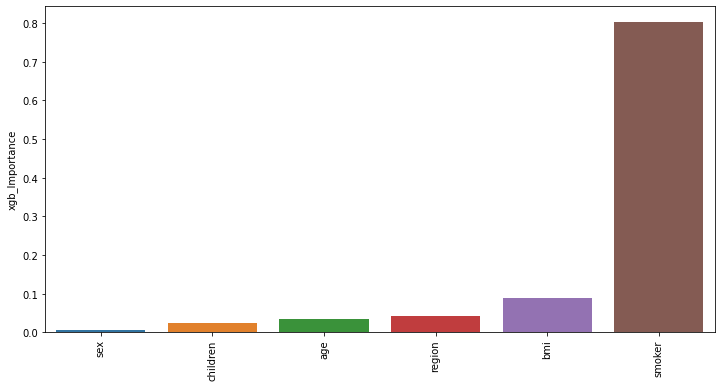

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_Importance')

plt.xticks(rotation=90);

## Feature importance comparison

Kullandigimiz tum modellerin feature importance' larini kiyaslarsak; XGBoost' un digerlerine gore daha iyi bir agirliklandirma yaptigini gorebiliriz. Boosting modellerde XGBoost' un feature importance' ini kullanmak sagliklidir. 

In [ ]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

## New model (>)

We select the most important features and make a new model out of them.

In [ ]:
X_new = df[["smoker",  "bmi"]]
X_new["smoker"].replace(to_replace= "yes", value=1, inplace=True)
X_new["smoker"].replace(to_replace= "no", value=0, inplace=True)


In [ ]:
X_new.head()

,smoker,bmi
0,0,25.745000
1,1,25.744165
2,0,30.030000
3,0,30.676891
4,0,32.010000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=42)

In [ ]:
XGB_model = XGBRegressor(random_state=42, objective="reg:squarederror")

In [ ]:
XGB_model.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', random_state=42)

In [ ]:
train_val(XGB_model, X_train, y_train, X_test, y_test)

,train,test
R2,7.482338e-01,7.175791e-01
mae,3.866740e+03,3.852156e+03
mse,2.880504e+07,2.590485e+07
rmse,5.367033e+03,5.089681e+03


In [ ]:
model = XGBRegressor(random_state=42, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                 0.999882
test_neg_mean_absolute_error          -65.060570
test_neg_mean_squared_error        -13609.101197
test_neg_root_mean_squared_error     -113.796849
dtype: float64

## Gridsearch for new XGBoost model

In [ ]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [ ]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [ ]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(objective='reg:squarederror',
                                    random_state=101),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [ ]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [ ]:
grid_model.best_score_

-1.193325439318438

XGBoost' un en onemli iki feature' i ile kurdugumuz yeni modelde best_score' un oldukca dustugunu goruyoruz. Asagida rmse skorlarina baktigimizda da train ve test set skorlarinin birbirine daha cok yaklastigini goruyoruz. 9 feature yerine 2 feature ile daha iyi skor aldigimiz icin bu modelle yola devam etmek mantikli olur.  Eger amac tum feature' lardan inside elde etmek ise tum feature' lar da kullanilabilir. Mesela saglik ile ilgili datalarda tum feature' lar onem arzedebilir. Bu durum amaca gore degiskenlik gosterir. 

In [ ]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.992991,0.960710
mae,0.284564,0.661908
mse,0.179196,0.993194
rmse,0.423315,0.996591


XGBoost diger modellere gore cok daha iyi sonuclar cikardi fakat bu durum her zaman boyle olmayabilir; gercek dunya verilerinde skorlarin kotu oldugu durumlar ile de karsilasabiliriz.

# Finalize and Submit

In [ ]:
final_model= grid_model

>> retrain your model according to available data. you missed 500 test data to train your model.

#### Load Data

In [ ]:
df_test = pd.read_csv("health_test.csv")
df_test.head()

,age,sex,bmi,smoker,region,children
0,39.296556,male,29.978109,no,northwest,4
1,40.367560,female,27.927669,no,southeast,5
2,32.881563,male,41.576865,no,southwest,5
3,62.000000,female,30.495000,no,northwest,2
4,32.476173,male,30.322774,yes,northeast,4


#### Encode

In [ ]:
cat = df_test.select_dtypes("object").columns
cat

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
enc = OrdinalEncoder()
df_test[cat] = enc.fit_transform(df_test[cat])
df_test.head()

,age,sex,bmi,smoker,region,children
0,39.296556,1.0,29.978109,0.0,1.0,4
1,40.367560,0.0,27.927669,0.0,2.0,5
2,32.881563,1.0,41.576865,0.0,3.0,5
3,62.000000,0.0,30.495000,0.0,1.0,2
4,32.476173,1.0,30.322774,1.0,0.0,4


#### Predict

In [ ]:
y_pred = final_model.predict(df_test)
y_pred

array([ 8380.981 ,  9454.915 ,  6352.4897, 15401.852 , 36510.562 ,
        5948.059 , 10678.202 , 10047.873 ,  9405.834 ,  2465.1428,
       12532.071 ,  4006.5913, 12061.051 ,  8629.52  , 11134.157 ,
        5960.003 ,  7477.824 ,  5176.4473,  3410.517 , 37922.773 ,
        4538.3687, 10995.645 , 31310.477 , 30596.623 ,  8606.58  ,
        5837.576 , 15103.242 ,  4390.164 ,  3673.4353, 24166.025 ,
        4947.538 ,  4660.4077,  4822.964 , 10524.256 , 39208.914 ,
        6170.1245, 18085.348 , 10418.872 , 10524.256 , 48649.145 ,
       14560.744 , 12386.184 , 18660.879 , 39054.426 ,  6195.6636,
        6647.382 ,  6248.183 , 10962.95  , 14182.771 , 17281.898 ,
       11533.591 ,  3197.0803, 10383.698 , 10894.584 , 10738.144 ,
       37380.895 , 10075.198 , 11852.763 ,  5991.746 , 10865.285 ,
        4952.3154, 43159.56  , 43488.652 , 35022.367 , 10524.256 ,
        9729.221 ,  7149.951 ,  6164.9976,  7081.8022, 38062.66  ,
       16912.828 ,  7427.758 ,  8093.889 , 11840.637 , 11024.5

#### Submit

In [ ]:
pd.DataFrame(y_pred).to_csv("C9807.csv", index=False)